# Predicting heart disease using machine learning

This notebook looks into using various pythonic-based machine learning and data science libraries to build a model capable of predicting whether or not someone has heart disease based on their medical attributes

## Steps I will be taking 
1. Problem definition
2. Data 
3. Evaluation 
4. Features 
5. Modelling 
6. Experimentation

7. ## 1. Problem Definition
    > Given clinical parameteres about a patient, can we predict whether ot not they have heart disease
   ## 2. Data
    1. id (Unique id for each patient)
    2. age (Age of the patient in years)
    3.  origin (place of study)
    4. sex (Male/Female)
    5. cp chest pain type
    6. ([typical angina, atypical angina, non-anginal, asymptomatic])
    7. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
    8. chol (serum cholesterol in mg/dl)
    9. fbs (if fasting blood sugar > 120 mg/dl)
    10. restecg (resting electrocardiographic results)
    11. -- Values: [normal, stt abnormality, lv hypertrophy]
    12. thalach: maximum heart rate achieved
    13. exang: exercise-induced angina (True/ False)
    14. oldpeak: ST depression induced by exercise relative to rest
    15. ca: number of major vessels (0-3) colored by fluoroscopy
    16. thal: [normal; fixed defect; reversible defect]
    17. num: the predicted attribute


# Heart Disease Dataset Data Dictionary

1. **age**
   - Description: Age in years
   - Type: Numeric
2. **sex**
   - Description: Gender
   - Type: Categorical
   - Encoding:
     - 1 = Male
     - 0 = Female
3. **cp**
   - Description: Chest pain type
   - Type: Categorical
   - Encoding:
     - 0: Typical angina (chest pain related to decreased blood supply to the heart)
     - 1: Atypical angina (chest pain not related to heart)
     - 2: Non-anginal pain (typically esophageal spasms, non heart-related)
     - 3: Asymptomatic (chest pain not showing signs of disease)
4. **trestbps**
   - Description: Resting blood pressure (in mm Hg on admission to the hospital)
   - Type: Numeric
   - Note: Anything above 130-140 is typically cause for concern
5. **chol**
   - Description: Serum cholesterol in mg/dl
   - Type: Numeric
   - Formula: serum = LDL + HDL + 0.2 * triglycerides
   - Note: Above 200 is cause for concern
6. **fbs**
   - Description: Fasting blood sugar > 120 mg/dl
   - Type: Categorical
   - Encoding:
     - 1 = True
     - 0 = False
   - Note: >126 mg/dL signals diabetes
7. **restecg**
   - Description: Resting electrocardiographic results
   - Type: Categorical
   - Encoding:
     - 0: Nothing to note
     - 1: ST-T Wave abnormality (can range from mild symptoms to severe problems, signals non-normal heart beat)
     - 2: Possible or definite left ventricular hypertrophy (enlarged heart's main pumping chamber)
8. **thalach**
   - Description: Maximum heart rate achieved
   - Type: Numeric
9. **exang**
   - Description: Exercise-induced angina
   - Type: Categorical
   - Encoding:
     - 1 = Yes
     - 0 = No
10. **oldpeak**
    - Description: ST depression induced by exercise relative to rest
    - Type: Numeric
    - Note: Looks at stress of heart during exercise; unhealthy heart will stress more
11. **slope**
    - Description: The slope of the peak exercise ST segment
    - Type: Categorical
    - Encoding:
      - 0: Upsloping (better heart rate with exercise, uncommon)
      - 1: Flatsloping (minimal change, typical healthy heart)
      - 2: Downsloping (signs of unhealthy heart)
12. **ca**
    - Description: Number of major vessels (0-3) colored by fluoroscopy
    - Type: Numeric
    - Note: Colored vessel means the doctor can see the blood passing through. The more blood movement, the better (no clots)
13. **thal**
    - Description: Thallium stress result
    - Type: Categorical
    - Encoding:
      - 1, 3: Normal
      - 6: Fixed defect (used to be defect but ok now)
      - 7: Reversible defect (no proper blood movement when exercising)
14. **target**
    - Description: Presence of heart disease
    - Type: Categorical
    - Encoding:
      - 1 = Yes
      - 0 = No
    - Note: This is the predicted attribute

## Preparing the tools

Pandas 
Numpy
Matplotlib for data analysis 

In [6]:
#Import 
#Regular EDA and Plotting libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#need plots to appear inside the notebook 

#Models
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 

#Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

# Import the data 

In [7]:
df = pd.read_csv("heart-disease.csv")

In [9]:
df.shape

(303, 14)

## Data Exploration 
The goal here is to find out more about the data 
1. What questions are you trying to solve
2. What kind of data do we have, and how do we treat different types?
3. What's missing from the data and how do you deal with it
4. Where are the outliers
5. How can you add, change or remove features to get more out of your data?
   

In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

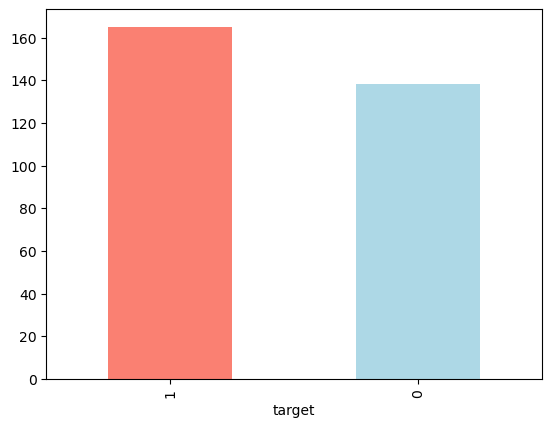

In [15]:
df["target"].value_counts().plot(kind="bar",color =["salmon", "lightblue"]);

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [20]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [21]:
## Compare target column with sex column 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


## Age vs Max Heart Rate for Heart Disease

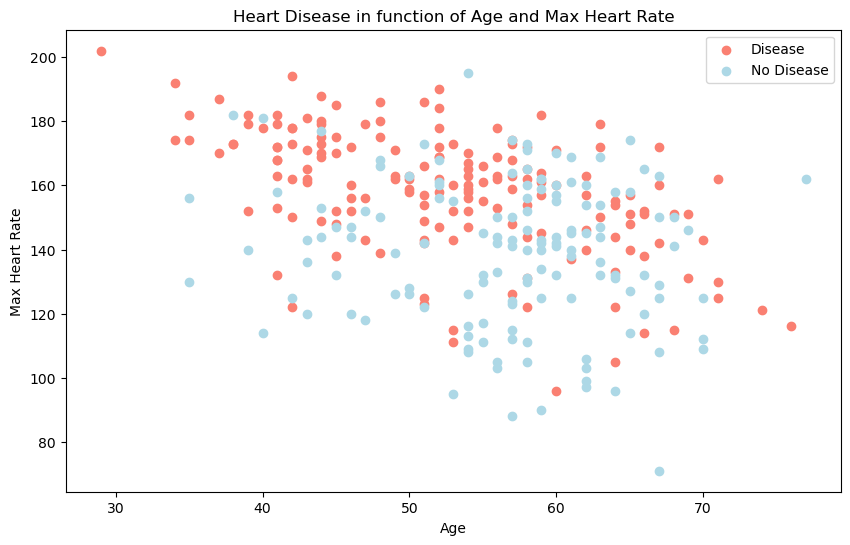

In [28]:
# Create another fig
plt.figure(figsize=(10,6))
# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

# Add some labels

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]) 

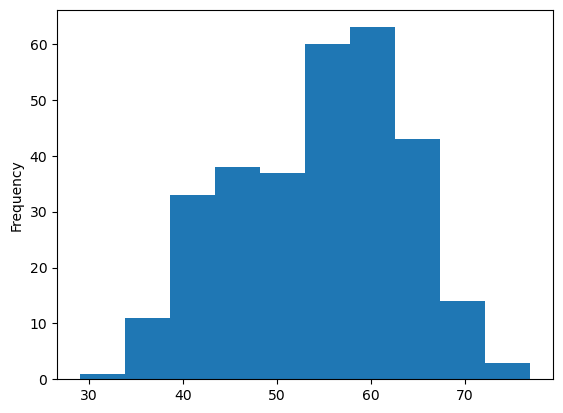

In [29]:
#Check Distribution 
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type 


Description: Chest pain type
Type: Categorical
Encoding:
0: Typical angina (chest pain related to decreased blood supply to the heart)
1: Atypical angina (chest pain not related to heart)
2: Non-anginal pain (typically esophageal spasms, non heart-related)
3: Asymptomatic (chest pain not showing signs of disease)

In [31]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


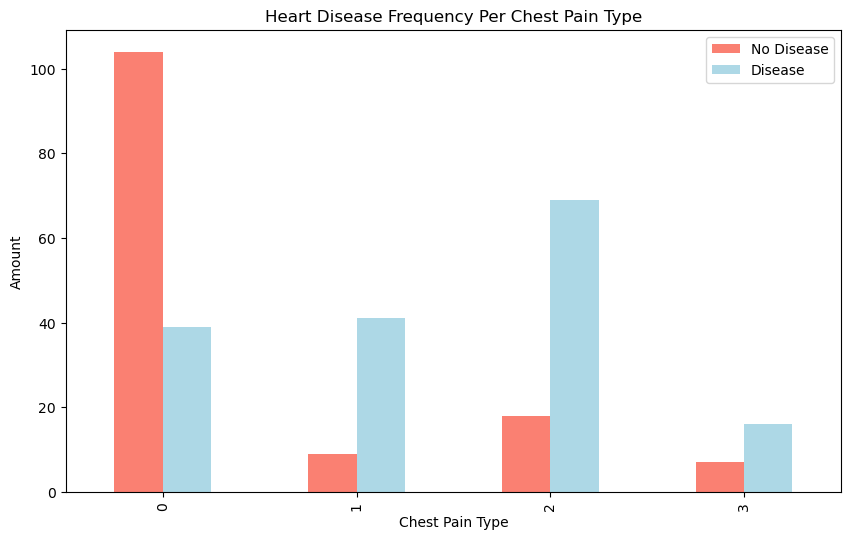

In [36]:
# Make the crosstab more visual 
pd.crosstab(df.cp,df.target).plot(kind ="bar", 
                                  figsize = (10,6),
                                  color = ["salmon", "lightblue"])

# Add some labels
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])

In [37]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


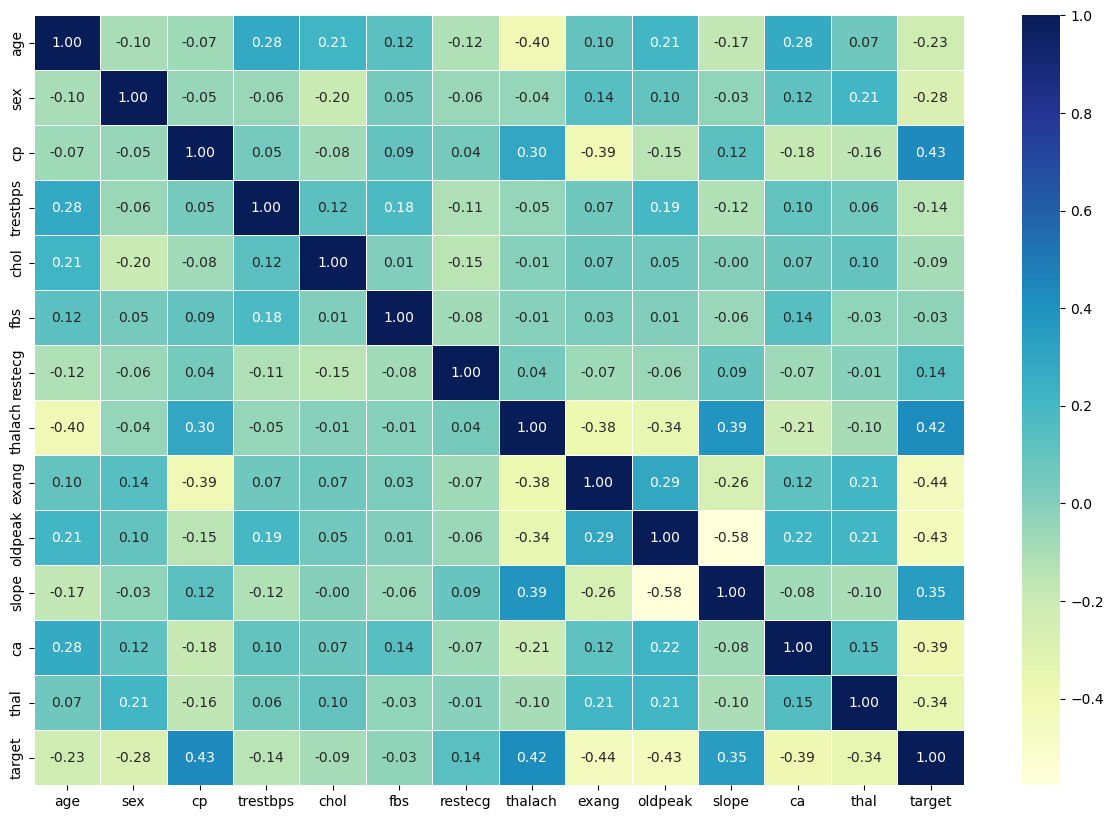

In [41]:
# Make correlation matrix visual 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

                    

## 5. Modelling 

In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
#Random Seed
np.random.seed(42)
# Split data into X and y 
X = df.drop("target", axis = 1)
y = df["target"]

#Train and Test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)




# Modeling 
3 Different Models
1. Logistic Regression
2. K-Nearest Neigbours Classifier
3. Random Forest Classifier

In [48]:
# Models in dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#Function to fit and score models 
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {
        
    }
    #loop thru models 
    for name, model in models.items():
        #Fit
        model.fit(X_train,y_train)
        #Eval 
        model_scores[name] = model.score(X_test,y_test)
    return model_scores
    

In [49]:
model_scores = fit_and_score(models=models,
                            X_train= X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

/Users/amolsrivastava/ENTER/envs/heart-disease-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.7868852459016393}

### Model Comparision

<Axes: >

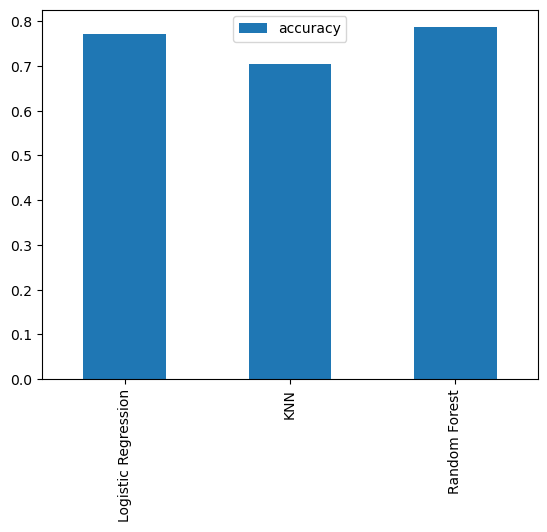

In [51]:
model_compare = pd.DataFrame(model_scores, index =["accuracy"])
model_compare.T.plot.bar()

# Baseline Models are Created 
Lets look at 
* Hyperparameter tuning
* Feature Importance 
* Confusion Matrix
* Cross-Validation
* Recall 
* F1 Score
* Classification Report
* ROC Curve
* Area under the curve (AUC)
### Hyperparameter Tuning

In [55]:
# Tune KNN
train_scores = []
test_scores = []

neighbours = range(1,21)

knn = KNeighborsClassifier()

#Loop Through 
for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

train_scores

[1.0,
 0.7975206611570248,
 0.8099173553719008,
 0.7644628099173554,
 0.768595041322314,
 0.756198347107438,
 0.743801652892562,
 0.7355371900826446,
 0.7024793388429752,
 0.7024793388429752,
 0.6942148760330579,
 0.6818181818181818,
 0.6818181818181818,
 0.6776859504132231,
 0.6818181818181818,
 0.6983471074380165,
 0.6776859504132231,
 0.6942148760330579,
 0.6735537190082644,
 0.6818181818181818]

In [56]:
test_scores

[0.5409836065573771,
 0.6065573770491803,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.7213114754098361,
 0.7704918032786885,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7213114754098361,
 0.6721311475409836,
 0.7049180327868853,
 0.7049180327868853,
 0.6721311475409836,
 0.6885245901639344,
 0.6885245901639344,
 0.7377049180327869,
 0.7049180327868853]

Maximum KNN Score on test: 77.05%


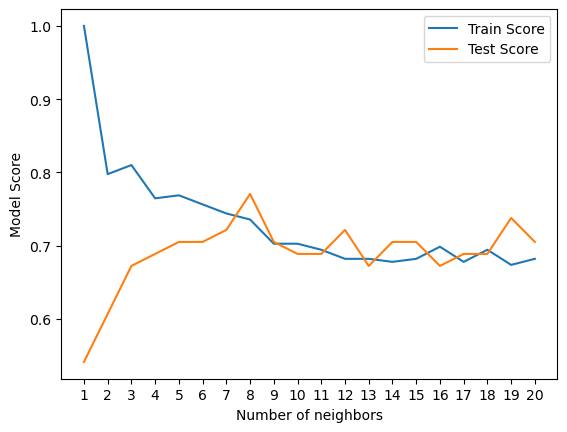

In [59]:
plt.plot(neighbours, train_scores, label="Train Score")
plt.plot(neighbours, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN Score on test: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV 

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()


In [67]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]
               }

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2)}

In [63]:
#Tune LogisticRegression Model

np.random.seed(42)

#Setup random hyperparameter search for LogistiRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
#Fit random hyperparameters search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [64]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [65]:
rs_log_reg.score(X_test,y_test)

0.7540983606557377

In [72]:
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=30,
                           verbose=True)

#Fit Model

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [76]:
# Find the best hyperparameters 
rs_rf.best_params_

{'n_estimators': 860,
 'min_samples_split': 16,
 'min_samples_leaf': 5,
 'max_depth': 5}

In [77]:
rs_rf.score(X_test,y_test)

0.7704918032786885

## Grid Search With Logistic Regression


In [83]:
# Different hyperparameters for our LogisticRegressionModel
log_reg_grid = {"C" : np.logspace(-4,4,30),
                "solver" : ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
#Fit 
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [84]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [85]:
gs_log_reg.score(X_test,y_test)

0.7540983606557377

## Evaluating our tuned ML CLassifier,
* ROC CURVE
* AUC Cruve
* Confusion Matrix
* Precisionn
* Recall 
* F1-score

In [95]:
# Make predicirons with tuned models
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

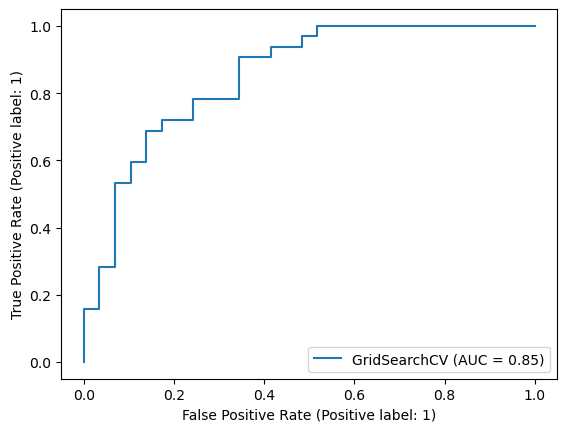

In [102]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);


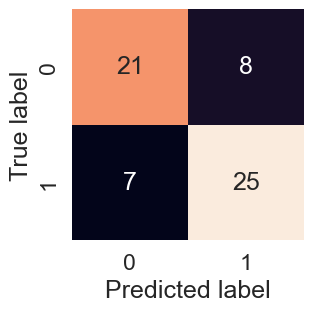

In [103]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [106]:
#Classification Report
print(classification_report(y_test,y_preds))
      

              precision    recall  f1-score   support

           0       0.75      0.72      0.74        29
           1       0.76      0.78      0.77        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



### Calculate evaluation metrics using cross-validation 


In [107]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [125]:
clf = LogisticRegression(C= 1.3738237958832638, 
                         solver = "liblinear")


<bound method ClassifierMixin.score of LogisticRegression(C=1.3738237958832638, solver='liblinear')>

In [117]:
#Cross-validated accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring ="accuracy")
cv_accc = np.mean(cv_acc)
cv_accc

0.8215300546448088

In [118]:
#Cross-validated precision
cv_pre = cross_val_score(clf,X,y,cv=5,scoring ="precision")
cv_pree = np.mean(cv_pre)
cv_pree

0.817900063251107

In [119]:
#Cross-validated recall
cv_rec = cross_val_score(clf,X,y,cv=5,scoring ="recall")
cv_recc= np.mean(cv_rec)
cv_recc

0.8727272727272727

In [121]:
#Cross-validated f1
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring ="f1")
cv_f11 = np.mean(cv_f1)
cv_f11

0.8431741323998502

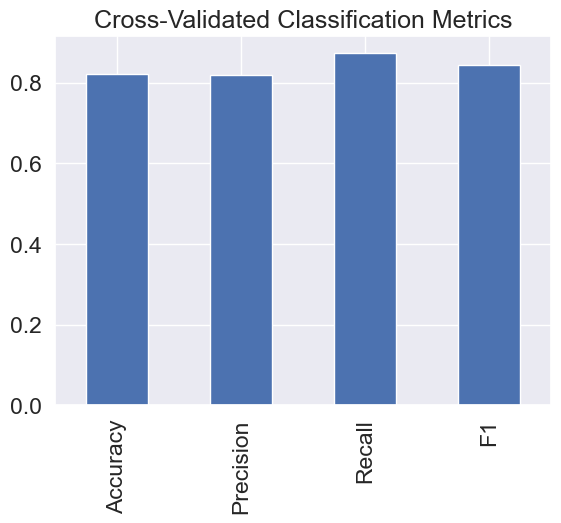

In [128]:
cv_metrics = pd.DataFrame({"Accuracy" : cv_accc,
                           "Precision" : cv_pree,
                           "Recall" : cv_recc,
                           "F1" : cv_f11},
                         index=[0])
cv_metrics.T.plot.bar(title = "Cross-Validated Classification Metrics",
                    legend = False);

## Feature Importance 


In [130]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [131]:
clf = LogisticRegression(C=  1.3738237958832638, 
                         solver ='liblinear')
clf.fit(X_train,y_train);

In [132]:
clf.coef_

array([[ 0.00806692, -1.25059894,  1.00527918, -0.01687069, -0.00269669,
        -0.10069096,  0.64326957,  0.02574793, -1.03268033, -0.5170048 ,
         0.81907246, -0.79972862, -0.85026477]])

In [135]:
 feature_dict = dict(zip(df.columns,list(clf.coef_[0]))) # Zipping the columns of our DF and the coef
feature_dict


{'age': 0.008066918373546984,
 'sex': -1.2505989438669203,
 'cp': 1.005279184476961,
 'trestbps': -0.016870688029333013,
 'chol': -0.002696692615592228,
 'fbs': -0.10069095760763945,
 'restecg': 0.643269572171864,
 'thalach': 0.025747930277861462,
 'exang': -1.0326803346834141,
 'oldpeak': -0.5170048045471918,
 'slope': 0.8190724575438039,
 'ca': -0.7997286211571526,
 'thal': -0.8502647726760854}

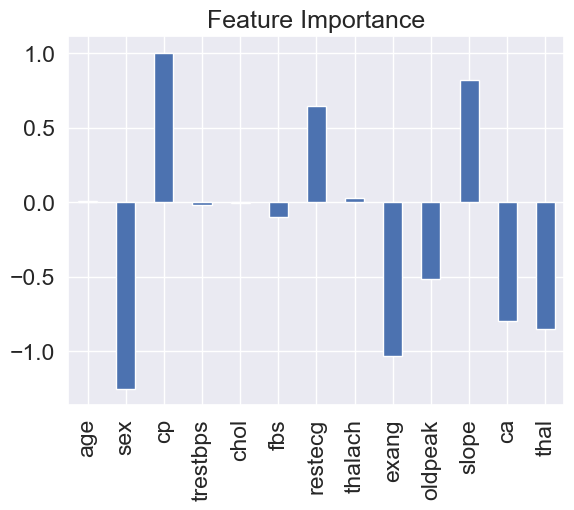

In [138]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend = False);